Cau 2: Tải dữ liệu thực nghiệm với tiền xử lý dữ liệu

In [7]:
from sklearn.datasets import fetch_openml
import numpy as np
from sklearn.preprocessing import QuantileTransformer, quantile_transform
#house_prices
ames = fetch_openml(name="house_prices", as_frame=True)
X = ames.data.select_dtypes(np.number)
X = X.drop(columns=["LotFrontage", "GarageYrBlt", "MasVnrArea"])
y = ames.target
y_trans = quantile_transform(
    y.to_frame(), n_quantiles=900, output_distribution="normal", copy=True
).squeeze()

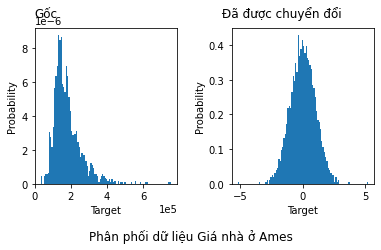

In [8]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
f, (ax0, ax1) = plt.subplots(1,2)

ax0.hist(y, bins=100, density=True)
ax0.set_ylabel("Probability")
ax0.set_xlabel("Target")
ax0.text(s="Gốc", x=0, y=9.8e-6, fontsize=12)
ax0.ticklabel_format(axis="both", style="sci", scilimits=(0, 0))

ax1.hist(y_trans, bins=100, density=True)
ax1.set_ylabel("Probability")
ax1.set_xlabel("Target")
ax1.text(s=" Đã được chuyển đổi", x=-6.8, y=0.479, fontsize=12)

f.suptitle("Phân phối dữ liệu Giá nhà ở Ames", y=0.04)
f.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

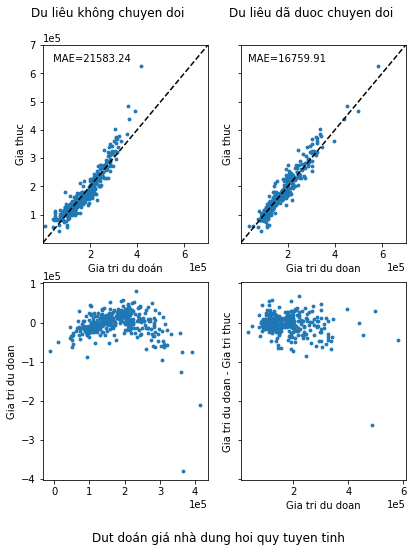

In [10]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error
from sklearn.compose import TransformedTargetRegressor

f, (ax0, ax1) = plt.subplots(2, 2, sharey="row", figsize=(6.5, 8))

regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

ax0[0].scatter (y_pred, y_test, s=8)
ax0[0].plot([10, 7e5], [0, 7e5], "--k")
ax0[0].set_ylabel("Gia thuc")
ax0[0].set_xlabel("Gia tri du doán")
ax0[0].text(
     s="Du liêu không chuyen doi" ,x=-5e4, y=8e5,fontsize=12,multialignment="center")
ax0[0].text(
     3e4, 64e4,r" MAE=%.2f"%(mean_absolute_error(y_test, y_pred)),)
ax0[0].set_xlim([10, 7e5])
ax0[0].set_ylim([10, 7e5])
ax0[0].ticklabel_format(axis="both",style="sci", scilimits= (0, 0))
ax1[0].scatter (y_pred, (y_pred - y_test), s=8)
ax1[0].set_ylabel("Gia tri du doan - Gia tri thuc")
ax1[0].set_ylabel("Gia tri du doan")
ax1[0].ticklabel_format(axis="both", style="sci", scilimits= (0, 0))

regr_trans  =TransformedTargetRegressor(
    regressor=LinearRegression(),
    transformer=QuantileTransformer(n_quantiles=900, output_distribution="normal"),)
regr_trans.fit(X_train, y_train)
y_pred = regr_trans.predict(X_test)
ax0[1].scatter (y_pred, y_test, s=8)
ax0[1].plot([0, 7e5], [0, 7e5], "--k")
ax0[1].set_ylabel("Gia thuc")
ax0[1].set_xlabel("Gia tri du doan")
ax0[1].text(
     s="Du liêu dã duoc chuyen doi" ,x=-5e4, y=8e5, fontsize=12, multialignment="center",)

ax0[1].text(3e4, 64e4, r"MAE=%.2f" % ( mean_absolute_error(y_test, y_pred)),
           )          
ax0[1].set_xlim([10, 7e5])
ax0[1].set_ylim([10, 7e5])
ax0[1].ticklabel_format(axis="both", style="sci", scilimits=(0, 0) )
ax1[1].scatter (y_pred, (y_pred - y_test), s=8)
ax1[1].set_ylabel("Gia tri du doan - Gia tri thuc")
ax1[1].set_xlabel("Gia tri du doan")
ax1[1].ticklabel_format(axis="both", style="sci", scilimits= (0, 0))
f.suptitle( "Dut doán giá nhà dung hoi quy tuyen tinh", y=0.035)
plt.show()


Cau 3: Chạy thực nghiệm code hình 4.29 trang 88, thực hiện đổi n_quantitles thành các số 1,2,5,10,100,500,1000. Kết hợp với khối lệnh ở Hình 4.22 để thực hiện chạy cross-validation với k=2 cho mỗi giá trị n_quantitles. Lập bảng so sánh và nhận xét kết quả.


n_quantitles = 1

/home/toandokhanh/.local/lib/python3.10/site-packages/sklearn/compose/_target.py:181: UserWarning: The provided functions or transformer are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'
  warnings.warn(


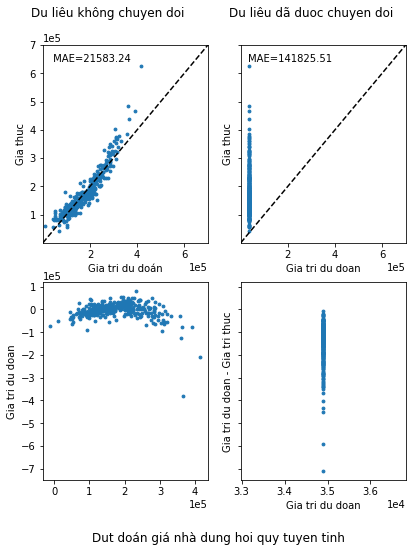

In [12]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error
from sklearn.compose import TransformedTargetRegressor

f, (ax0, ax1) = plt.subplots(2, 2, sharey="row", figsize=(6.5, 8))

regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

ax0[0].scatter (y_pred, y_test, s=8)
ax0[0].plot([10, 7e5], [0, 7e5], "--k")
ax0[0].set_ylabel("Gia thuc")
ax0[0].set_xlabel("Gia tri du doán")
ax0[0].text(
     s="Du liêu không chuyen doi" ,x=-5e4, y=8e5,fontsize=12,multialignment="center")
ax0[0].text(
     3e4, 64e4,r" MAE=%.2f"%(mean_absolute_error(y_test, y_pred)),)
ax0[0].set_xlim([10, 7e5])
ax0[0].set_ylim([10, 7e5])
ax0[0].ticklabel_format(axis="both",style="sci", scilimits= (0, 0))
ax1[0].scatter (y_pred, (y_pred - y_test), s=8)
ax1[0].set_ylabel("Gia tri du doan - Gia tri thuc")
ax1[0].set_ylabel("Gia tri du doan")
ax1[0].ticklabel_format(axis="both", style="sci", scilimits= (0, 0))

regr_trans  =TransformedTargetRegressor(
    regressor=LinearRegression(),
    transformer=QuantileTransformer(n_quantiles=1, output_distribution="normal"),)
regr_trans.fit(X_train, y_train)
y_pred = regr_trans.predict(X_test)
ax0[1].scatter (y_pred, y_test, s=8)
ax0[1].plot([0, 7e5], [0, 7e5], "--k")
ax0[1].set_ylabel("Gia thuc")
ax0[1].set_xlabel("Gia tri du doan")
ax0[1].text(
     s="Du liêu dã duoc chuyen doi" ,x=-5e4, y=8e5, fontsize=12, multialignment="center",)

ax0[1].text(3e4, 64e4, r"MAE=%.2f" % ( mean_absolute_error(y_test, y_pred)),
           )          
ax0[1].set_xlim([10, 7e5])
ax0[1].set_ylim([10, 7e5])
ax0[1].ticklabel_format(axis="both", style="sci", scilimits=(0, 0) )
ax1[1].scatter (y_pred, (y_pred - y_test), s=8)
ax1[1].set_ylabel("Gia tri du doan - Gia tri thuc")
ax1[1].set_xlabel("Gia tri du doan")
ax1[1].ticklabel_format(axis="both", style="sci", scilimits= (0, 0))
f.suptitle( "Dut doán giá nhà dung hoi quy tuyen tinh", y=0.035)
plt.show()


n_quantitles = 2

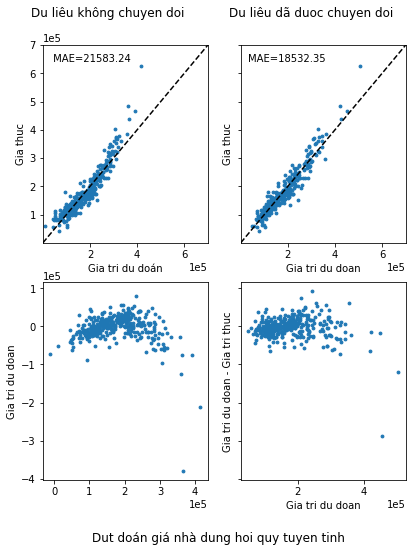

In [14]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error
from sklearn.compose import TransformedTargetRegressor

f, (ax0, ax1) = plt.subplots(2, 2, sharey="row", figsize=(6.5, 8))

regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

ax0[0].scatter (y_pred, y_test, s=8)
ax0[0].plot([10, 7e5], [0, 7e5], "--k")
ax0[0].set_ylabel("Gia thuc")
ax0[0].set_xlabel("Gia tri du doán")
ax0[0].text(
     s="Du liêu không chuyen doi" ,x=-5e4, y=8e5,fontsize=12,multialignment="center")
ax0[0].text(
     3e4, 64e4,r" MAE=%.2f"%(mean_absolute_error(y_test, y_pred)),)
ax0[0].set_xlim([10, 7e5])
ax0[0].set_ylim([10, 7e5])
ax0[0].ticklabel_format(axis="both",style="sci", scilimits= (0, 0))
ax1[0].scatter (y_pred, (y_pred - y_test), s=8)
ax1[0].set_ylabel("Gia tri du doan - Gia tri thuc")
ax1[0].set_ylabel("Gia tri du doan")
ax1[0].ticklabel_format(axis="both", style="sci", scilimits= (0, 0))

regr_trans  =TransformedTargetRegressor(
    regressor=LinearRegression(),
    transformer=QuantileTransformer(n_quantiles=2, output_distribution="normal"),)
regr_trans.fit(X_train, y_train)
y_pred = regr_trans.predict(X_test)
ax0[1].scatter (y_pred, y_test, s=8)
ax0[1].plot([0, 7e5], [0, 7e5], "--k")
ax0[1].set_ylabel("Gia thuc")
ax0[1].set_xlabel("Gia tri du doan")
ax0[1].text(
     s="Du liêu dã duoc chuyen doi" ,x=-5e4, y=8e5, fontsize=12, multialignment="center",)

ax0[1].text(3e4, 64e4, r"MAE=%.2f" % ( mean_absolute_error(y_test, y_pred)),
           )          
ax0[1].set_xlim([10, 7e5])
ax0[1].set_ylim([10, 7e5])
ax0[1].ticklabel_format(axis="both", style="sci", scilimits=(0, 0) )
ax1[1].scatter (y_pred, (y_pred - y_test), s=8)
ax1[1].set_ylabel("Gia tri du doan - Gia tri thuc")
ax1[1].set_xlabel("Gia tri du doan")
ax1[1].ticklabel_format(axis="both", style="sci", scilimits= (0, 0))
f.suptitle( "Dut doán giá nhà dung hoi quy tuyen tinh", y=0.035)
plt.show()


n_quantitles = 5


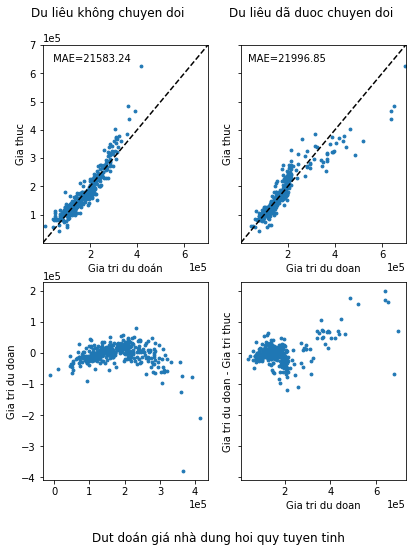

In [21]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error
from sklearn.compose import TransformedTargetRegressor

f, (ax0, ax1) = plt.subplots(2, 2, sharey="row", figsize=(6.5, 8))

regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

ax0[0].scatter (y_pred, y_test, s=8)
ax0[0].plot([10, 7e5], [0, 7e5], "--k")
ax0[0].set_ylabel("Gia thuc")
ax0[0].set_xlabel("Gia tri du doán")
ax0[0].text(
     s="Du liêu không chuyen doi" ,x=-5e4, y=8e5,fontsize=12,multialignment="center")
ax0[0].text(
     3e4, 64e4,r" MAE=%.2f"%(mean_absolute_error(y_test, y_pred)),)
ax0[0].set_xlim([10, 7e5])
ax0[0].set_ylim([10, 7e5])
ax0[0].ticklabel_format(axis="both",style="sci", scilimits= (0, 0))
ax1[0].scatter (y_pred, (y_pred - y_test), s=8)
ax1[0].set_ylabel("Gia tri du doan - Gia tri thuc")
ax1[0].set_ylabel("Gia tri du doan")
ax1[0].ticklabel_format(axis="both", style="sci", scilimits= (0, 0))

regr_trans  =TransformedTargetRegressor(
    regressor=LinearRegression(),
    transformer=QuantileTransformer(n_quantiles=5, output_distribution="normal"),)
regr_trans.fit(X_train, y_train)
y_pred = regr_trans.predict(X_test)
ax0[1].scatter (y_pred, y_test, s=8)
ax0[1].plot([0, 7e5], [0, 7e5], "--k")
ax0[1].set_ylabel("Gia thuc")
ax0[1].set_xlabel("Gia tri du doan")
ax0[1].text(
     s="Du liêu dã duoc chuyen doi" ,x=-5e4, y=8e5, fontsize=12, multialignment="center",)

ax0[1].text(3e4, 64e4, r"MAE=%.2f" % ( mean_absolute_error(y_test, y_pred)),
           )          
ax0[1].set_xlim([10, 7e5])
ax0[1].set_ylim([10, 7e5])
ax0[1].ticklabel_format(axis="both", style="sci", scilimits=(0, 0) )
ax1[1].scatter (y_pred, (y_pred - y_test), s=8)
ax1[1].set_ylabel("Gia tri du doan - Gia tri thuc")
ax1[1].set_xlabel("Gia tri du doan")
ax1[1].ticklabel_format(axis="both", style="sci", scilimits= (0, 0))
f.suptitle( "Dut doán giá nhà dung hoi quy tuyen tinh", y=0.035)
plt.show()


N_quantitles =10

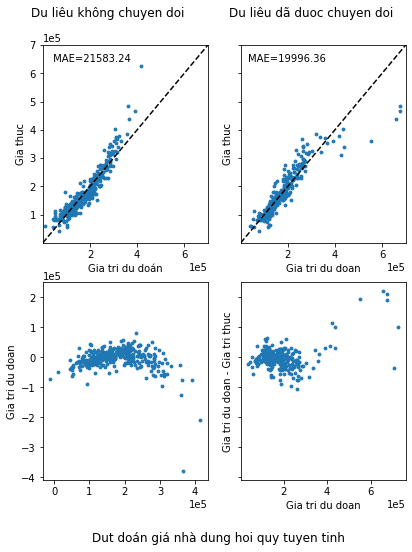

In [26]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error
from sklearn.compose import TransformedTargetRegressor

f, (ax0, ax1) = plt.subplots(2, 2, sharey="row", figsize=(6.5, 8))

regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

ax0[0].scatter (y_pred, y_test, s=8)
ax0[0].plot([10, 7e5], [0, 7e5], "--k")
ax0[0].set_ylabel("Gia thuc")
ax0[0].set_xlabel("Gia tri du doán")
ax0[0].text(
     s="Du liêu không chuyen doi" ,x=-5e4, y=8e5,fontsize=12,multialignment="center")
ax0[0].text(
     3e4, 64e4,r" MAE=%.2f"%(mean_absolute_error(y_test, y_pred)),)
ax0[0].set_xlim([10, 7e5])
ax0[0].set_ylim([10, 7e5])
ax0[0].ticklabel_format(axis="both",style="sci", scilimits= (0, 0))
ax1[0].scatter (y_pred, (y_pred - y_test), s=8)
ax1[0].set_ylabel("Gia tri du doan - Gia tri thuc")
ax1[0].set_ylabel("Gia tri du doan")
ax1[0].ticklabel_format(axis="both", style="sci", scilimits= (0, 0))

regr_trans  =TransformedTargetRegressor(
    regressor=LinearRegression(),
    transformer=QuantileTransformer(n_quantiles=10, output_distribution="normal"),)
regr_trans.fit(X_train, y_train)
y_pred = regr_trans.predict(X_test)
ax0[1].scatter (y_pred, y_test, s=8)
ax0[1].plot([0, 7e5], [0, 7e5], "--k")
ax0[1].set_ylabel("Gia thuc")
ax0[1].set_xlabel("Gia tri du doan")
ax0[1].text(
     s="Du liêu dã duoc chuyen doi" ,x=-5e4, y=8e5, fontsize=12, multialignment="center",)

ax0[1].text(3e4, 64e4, r"MAE=%.2f" % ( mean_absolute_error(y_test, y_pred)),
           )          
ax0[1].set_xlim([10, 7e5])
ax0[1].set_ylim([10, 7e5])
ax0[1].ticklabel_format(axis="both", style="sci", scilimits=(0, 0) )
ax1[1].scatter (y_pred, (y_pred - y_test), s=8)
ax1[1].set_ylabel("Gia tri du doan - Gia tri thuc")
ax1[1].set_xlabel("Gia tri du doan")
ax1[1].ticklabel_format(axis="both", style="sci", scilimits= (0, 0))
f.suptitle( "Dut doán giá nhà dung hoi quy tuyen tinh", y=0.035)
plt.show()


n_quantitles = 50

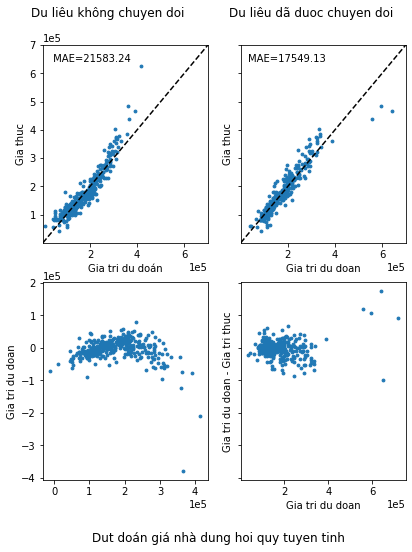

In [22]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error
from sklearn.compose import TransformedTargetRegressor

f, (ax0, ax1) = plt.subplots(2, 2, sharey="row", figsize=(6.5, 8))

regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

ax0[0].scatter (y_pred, y_test, s=8)
ax0[0].plot([10, 7e5], [0, 7e5], "--k")
ax0[0].set_ylabel("Gia thuc")
ax0[0].set_xlabel("Gia tri du doán")
ax0[0].text(
     s="Du liêu không chuyen doi" ,x=-5e4, y=8e5,fontsize=12,multialignment="center")
ax0[0].text(
     3e4, 64e4,r" MAE=%.2f"%(mean_absolute_error(y_test, y_pred)),)
ax0[0].set_xlim([10, 7e5])
ax0[0].set_ylim([10, 7e5])
ax0[0].ticklabel_format(axis="both",style="sci", scilimits= (0, 0))
ax1[0].scatter (y_pred, (y_pred - y_test), s=8)
ax1[0].set_ylabel("Gia tri du doan - Gia tri thuc")
ax1[0].set_ylabel("Gia tri du doan")
ax1[0].ticklabel_format(axis="both", style="sci", scilimits= (0, 0))

regr_trans  =TransformedTargetRegressor(
    regressor=LinearRegression(),
    transformer=QuantileTransformer(n_quantiles=50, output_distribution="normal"),)
regr_trans.fit(X_train, y_train)
y_pred = regr_trans.predict(X_test)
ax0[1].scatter (y_pred, y_test, s=8)
ax0[1].plot([0, 7e5], [0, 7e5], "--k")
ax0[1].set_ylabel("Gia thuc")
ax0[1].set_xlabel("Gia tri du doan")
ax0[1].text(
     s="Du liêu dã duoc chuyen doi" ,x=-5e4, y=8e5, fontsize=12, multialignment="center",)

ax0[1].text(3e4, 64e4, r"MAE=%.2f" % ( mean_absolute_error(y_test, y_pred)),
           )          
ax0[1].set_xlim([10, 7e5])
ax0[1].set_ylim([10, 7e5])
ax0[1].ticklabel_format(axis="both", style="sci", scilimits=(0, 0) )
ax1[1].scatter (y_pred, (y_pred - y_test), s=8)
ax1[1].set_ylabel("Gia tri du doan - Gia tri thuc")
ax1[1].set_xlabel("Gia tri du doan")
ax1[1].ticklabel_format(axis="both", style="sci", scilimits= (0, 0))
f.suptitle( "Dut doán giá nhà dung hoi quy tuyen tinh", y=0.035)
plt.show()


n_quantitles = 100

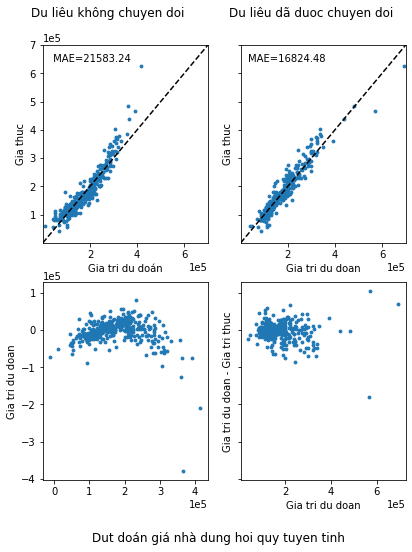

In [23]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error
from sklearn.compose import TransformedTargetRegressor

f, (ax0, ax1) = plt.subplots(2, 2, sharey="row", figsize=(6.5, 8))

regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

ax0[0].scatter (y_pred, y_test, s=8)
ax0[0].plot([10, 7e5], [0, 7e5], "--k")
ax0[0].set_ylabel("Gia thuc")
ax0[0].set_xlabel("Gia tri du doán")
ax0[0].text(
     s="Du liêu không chuyen doi" ,x=-5e4, y=8e5,fontsize=12,multialignment="center")
ax0[0].text(
     3e4, 64e4,r" MAE=%.2f"%(mean_absolute_error(y_test, y_pred)),)
ax0[0].set_xlim([10, 7e5])
ax0[0].set_ylim([10, 7e5])
ax0[0].ticklabel_format(axis="both",style="sci", scilimits= (0, 0))
ax1[0].scatter (y_pred, (y_pred - y_test), s=8)
ax1[0].set_ylabel("Gia tri du doan - Gia tri thuc")
ax1[0].set_ylabel("Gia tri du doan")
ax1[0].ticklabel_format(axis="both", style="sci", scilimits= (0, 0))

regr_trans  =TransformedTargetRegressor(
    regressor=LinearRegression(),
    transformer=QuantileTransformer(n_quantiles=100, output_distribution="normal"),)
regr_trans.fit(X_train, y_train)
y_pred = regr_trans.predict(X_test)
ax0[1].scatter (y_pred, y_test, s=8)
ax0[1].plot([0, 7e5], [0, 7e5], "--k")
ax0[1].set_ylabel("Gia thuc")
ax0[1].set_xlabel("Gia tri du doan")
ax0[1].text(
     s="Du liêu dã duoc chuyen doi" ,x=-5e4, y=8e5, fontsize=12, multialignment="center",)

ax0[1].text(3e4, 64e4, r"MAE=%.2f" % ( mean_absolute_error(y_test, y_pred)),
           )          
ax0[1].set_xlim([10, 7e5])
ax0[1].set_ylim([10, 7e5])
ax0[1].ticklabel_format(axis="both", style="sci", scilimits=(0, 0) )
ax1[1].scatter (y_pred, (y_pred - y_test), s=8)
ax1[1].set_ylabel("Gia tri du doan - Gia tri thuc")
ax1[1].set_xlabel("Gia tri du doan")
ax1[1].ticklabel_format(axis="both", style="sci", scilimits= (0, 0))
f.suptitle( "Dut doán giá nhà dung hoi quy tuyen tinh", y=0.035)
plt.show()


n_quantitles = 500

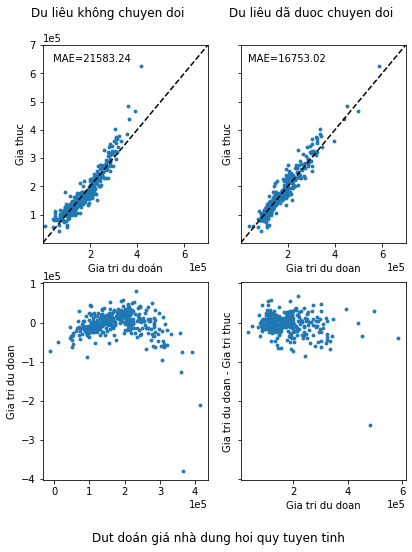

In [24]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error
from sklearn.compose import TransformedTargetRegressor

f, (ax0, ax1) = plt.subplots(2, 2, sharey="row", figsize=(6.5, 8))

regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

ax0[0].scatter (y_pred, y_test, s=8)
ax0[0].plot([10, 7e5], [0, 7e5], "--k")
ax0[0].set_ylabel("Gia thuc")
ax0[0].set_xlabel("Gia tri du doán")
ax0[0].text(
     s="Du liêu không chuyen doi" ,x=-5e4, y=8e5,fontsize=12,multialignment="center")
ax0[0].text(
     3e4, 64e4,r" MAE=%.2f"%(mean_absolute_error(y_test, y_pred)),)
ax0[0].set_xlim([10, 7e5])
ax0[0].set_ylim([10, 7e5])
ax0[0].ticklabel_format(axis="both",style="sci", scilimits= (0, 0))
ax1[0].scatter (y_pred, (y_pred - y_test), s=8)
ax1[0].set_ylabel("Gia tri du doan - Gia tri thuc")
ax1[0].set_ylabel("Gia tri du doan")
ax1[0].ticklabel_format(axis="both", style="sci", scilimits= (0, 0))

regr_trans  =TransformedTargetRegressor(
    regressor=LinearRegression(),
    transformer=QuantileTransformer(n_quantiles=500, output_distribution="normal"),)
regr_trans.fit(X_train, y_train)
y_pred = regr_trans.predict(X_test)
ax0[1].scatter (y_pred, y_test, s=8)
ax0[1].plot([0, 7e5], [0, 7e5], "--k")
ax0[1].set_ylabel("Gia thuc")
ax0[1].set_xlabel("Gia tri du doan")
ax0[1].text(
     s="Du liêu dã duoc chuyen doi" ,x=-5e4, y=8e5, fontsize=12, multialignment="center",)

ax0[1].text(3e4, 64e4, r"MAE=%.2f" % ( mean_absolute_error(y_test, y_pred)),
           )          
ax0[1].set_xlim([10, 7e5])
ax0[1].set_ylim([10, 7e5])
ax0[1].ticklabel_format(axis="both", style="sci", scilimits=(0, 0) )
ax1[1].scatter (y_pred, (y_pred - y_test), s=8)
ax1[1].set_ylabel("Gia tri du doan - Gia tri thuc")
ax1[1].set_xlabel("Gia tri du doan")
ax1[1].ticklabel_format(axis="both", style="sci", scilimits= (0, 0))
f.suptitle( "Dut doán giá nhà dung hoi quy tuyen tinh", y=0.035)
plt.show()


n_quantitles = 1000

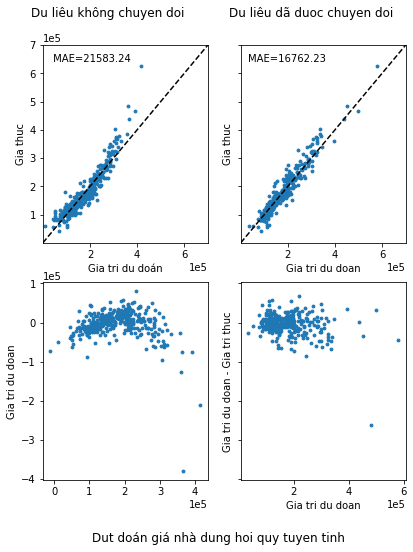

In [25]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error
from sklearn.compose import TransformedTargetRegressor

f, (ax0, ax1) = plt.subplots(2, 2, sharey="row", figsize=(6.5, 8))

regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

ax0[0].scatter (y_pred, y_test, s=8)
ax0[0].plot([10, 7e5], [0, 7e5], "--k")
ax0[0].set_ylabel("Gia thuc")
ax0[0].set_xlabel("Gia tri du doán")
ax0[0].text(
     s="Du liêu không chuyen doi" ,x=-5e4, y=8e5,fontsize=12,multialignment="center")
ax0[0].text(
     3e4, 64e4,r" MAE=%.2f"%(mean_absolute_error(y_test, y_pred)),)
ax0[0].set_xlim([10, 7e5])
ax0[0].set_ylim([10, 7e5])
ax0[0].ticklabel_format(axis="both",style="sci", scilimits= (0, 0))
ax1[0].scatter (y_pred, (y_pred - y_test), s=8)
ax1[0].set_ylabel("Gia tri du doan - Gia tri thuc")
ax1[0].set_ylabel("Gia tri du doan")
ax1[0].ticklabel_format(axis="both", style="sci", scilimits= (0, 0))

regr_trans  =TransformedTargetRegressor(
    regressor=LinearRegression(),
    transformer=QuantileTransformer(n_quantiles=1000, output_distribution="normal"),)
regr_trans.fit(X_train, y_train)
y_pred = regr_trans.predict(X_test)
ax0[1].scatter (y_pred, y_test, s=8)
ax0[1].plot([0, 7e5], [0, 7e5], "--k")
ax0[1].set_ylabel("Gia thuc")
ax0[1].set_xlabel("Gia tri du doan")
ax0[1].text(
     s="Du liêu dã duoc chuyen doi" ,x=-5e4, y=8e5, fontsize=12, multialignment="center",)

ax0[1].text(3e4, 64e4, r"MAE=%.2f" % ( mean_absolute_error(y_test, y_pred)),
           )          
ax0[1].set_xlim([10, 7e5])
ax0[1].set_ylim([10, 7e5])
ax0[1].ticklabel_format(axis="both", style="sci", scilimits=(0, 0) )
ax1[1].scatter (y_pred, (y_pred - y_test), s=8)
ax1[1].set_ylabel("Gia tri du doan - Gia tri thuc")
ax1[1].set_xlabel("Gia tri du doan")
ax1[1].ticklabel_format(axis="both", style="sci", scilimits= (0, 0))
f.suptitle( "Dut doán giá nhà dung hoi quy tuyen tinh", y=0.035)
plt.show()


Câu 4: Chạy thực nghiệm code hình 4.29 trang 88, thực hiện đổi output_distribution thành uniform. Kết hợp với khối lệnh ở Hình 4.22 để thực hiện chạy cross-validation với k=2 để thể hiện các độ đo accuracy, f1-score, recall. Lập bảng so sánh và nhận xét kết quả.



In [27]:
from sklearn.datasets import fetch_openml
import numpy as np
from sklearn.preprocessing import QuantileTransformer, quantile_transform
#house_prices
ames = fetch_openml(name="house_prices", as_frame=True)
# Giu lai cac cot kieu numerio
X = ames.data.select_dtypes(np.number)
# Xoa cac cot chua NaN hoac Inf
X = X.drop(columns=["LotFrontage", "GarageYrBlt", "MasVnrArea"])
y = ames.target
y_trans = quantile_transform(
    y.to_frame(), n_quantiles=900, output_distribution="normal", copy=True
).squeeze()

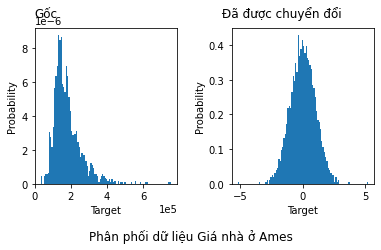

In [28]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
f, (ax0, ax1) = plt.subplots(1,2)

ax0.hist(y, bins=100, density=True)
ax0.set_ylabel("Probability")
ax0.set_xlabel("Target")
ax0.text(s="Gốc", x=0, y=9.8e-6, fontsize=12)
ax0.ticklabel_format(axis="both", style="sci", scilimits=(0, 0))

ax1.hist(y_trans, bins=100, density=True)
ax1.set_ylabel("Probability")
ax1.set_xlabel("Target")
ax1.text(s=" Đã được chuyển đổi", x=-6.8, y=0.479, fontsize=12)

f.suptitle("Phân phối dữ liệu Giá nhà ở Ames", y=0.04)
f.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

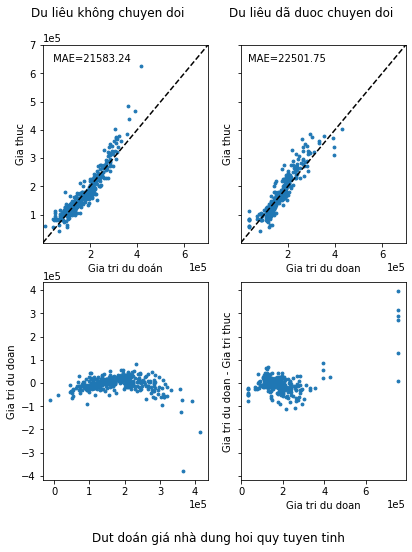

In [33]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error
from sklearn.compose import TransformedTargetRegressor

f, (ax0, ax1) = plt.subplots(2, 2, sharey="row", figsize=(6.5, 8))

regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

ax0[0].scatter (y_pred, y_test, s=8)
ax0[0].plot([10, 7e5], [0, 7e5], "--k")
ax0[0].set_ylabel("Gia thuc")
ax0[0].set_xlabel("Gia tri du doán")
ax0[0].text(
     s="Du liêu không chuyen doi" ,x=-5e4, y=8e5,fontsize=12,multialignment="center")
ax0[0].text(
     3e4, 64e4,r" MAE=%.2f"%(mean_absolute_error(y_test, y_pred)),)
ax0[0].set_xlim([10, 7e5])
ax0[0].set_ylim([10, 7e5])
ax0[0].ticklabel_format(axis="both",style="sci", scilimits= (0, 0))
ax1[0].scatter (y_pred, (y_pred - y_test), s=8)
ax1[0].set_ylabel("Gia tri du doan - Gia tri thuc")
ax1[0].set_ylabel("Gia tri du doan")
ax1[0].ticklabel_format(axis="both", style="sci", scilimits= (0, 0))

regr_trans  =TransformedTargetRegressor(
    regressor=LinearRegression(),
    transformer=QuantileTransformer(n_quantiles=900, output_distribution="uniform"),)
regr_trans.fit(X_train, y_train)
y_pred = regr_trans.predict(X_test)
ax0[1].scatter (y_pred, y_test, s=8)
ax0[1].plot([0, 7e5], [0, 7e5], "--k")
ax0[1].set_ylabel("Gia thuc")
ax0[1].set_xlabel("Gia tri du doan")
ax0[1].text(
     s="Du liêu dã duoc chuyen doi" ,x=-5e4, y=8e5, fontsize=12, multialignment="center",)

ax0[1].text(3e4, 64e4, r"MAE=%.2f" % ( mean_absolute_error(y_test, y_pred)),
           )          
ax0[1].set_xlim([10, 7e5])
ax0[1].set_ylim([10, 7e5])
ax0[1].ticklabel_format(axis="both", style="sci", scilimits=(0, 0) )
ax1[1].scatter (y_pred, (y_pred - y_test), s=8)
ax1[1].set_ylabel("Gia tri du doan - Gia tri thuc")
ax1[1].set_xlabel("Gia tri du doan")
ax1[1].ticklabel_format(axis="both", style="sci", scilimits= (0, 0))
f.suptitle( "Dut doán giá nhà dung hoi quy tuyen tinh", y=0.035)
plt.show()


Câu 5: Chạy thực nghiệm code hình 4.29 trang 88, nhưng đối giải thuật tiền xử lý là MinMaxScaler. Gợi ý: đổi lại hàm tiền xử lý ở dòng 31 hình 4.29


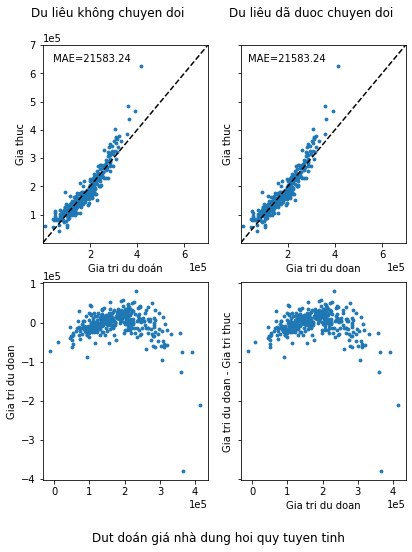

In [35]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import MinMaxScaler

f, (ax0, ax1) = plt.subplots(2, 2, sharey="row", figsize=(6.5, 8))

regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

ax0[0].scatter (y_pred, y_test, s=8)
ax0[0].plot([10, 7e5], [0, 7e5], "--k")
ax0[0].set_ylabel("Gia thuc")
ax0[0].set_xlabel("Gia tri du doán")
ax0[0].text(
     s="Du liêu không chuyen doi" ,x=-5e4, y=8e5,fontsize=12,multialignment="center")
ax0[0].text(
     3e4, 64e4,r" MAE=%.2f"%(mean_absolute_error(y_test, y_pred)),)
ax0[0].set_xlim([10, 7e5])
ax0[0].set_ylim([10, 7e5])
ax0[0].ticklabel_format(axis="both",style="sci", scilimits= (0, 0))
ax1[0].scatter (y_pred, (y_pred - y_test), s=8)
ax1[0].set_ylabel("Gia tri du doan - Gia tri thuc")
ax1[0].set_ylabel("Gia tri du doan")
ax1[0].ticklabel_format(axis="both", style="sci", scilimits= (0, 0))

regr_trans  =TransformedTargetRegressor(
    regressor=LinearRegression(),
    transformer=MinMaxScaler(),)
regr_trans.fit(X_train, y_train)
y_pred = regr_trans.predict(X_test)
ax0[1].scatter (y_pred, y_test, s=8)
ax0[1].plot([0, 7e5], [0, 7e5], "--k")
ax0[1].set_ylabel("Gia thuc")
ax0[1].set_xlabel("Gia tri du doan")
ax0[1].text(
     s="Du liêu dã duoc chuyen doi" ,x=-5e4, y=8e5, fontsize=12, multialignment="center",)

ax0[1].text(3e4, 64e4, r"MAE=%.2f" % ( mean_absolute_error(y_test, y_pred)),
           )          
ax0[1].set_xlim([10, 7e5])
ax0[1].set_ylim([10, 7e5])
ax0[1].ticklabel_format(axis="both", style="sci", scilimits=(0, 0) )
ax1[1].scatter (y_pred, (y_pred - y_test), s=8)
ax1[1].set_ylabel("Gia tri du doan - Gia tri thuc")
ax1[1].set_xlabel("Gia tri du doan")
ax1[1].ticklabel_format(axis="both", style="sci", scilimits= (0, 0))
f.suptitle( "Dut doán giá nhà dung hoi quy tuyen tinh", y=0.035)
plt.show()


Câu 6: Chạy thực nghiệm code hình 4.29 trang 88, nhưng đối giải thuật tiền xử lý là StandardScaler. Gợi ý: đổi lại hàm tiền xử lý ở dòng 31 hình 4.29

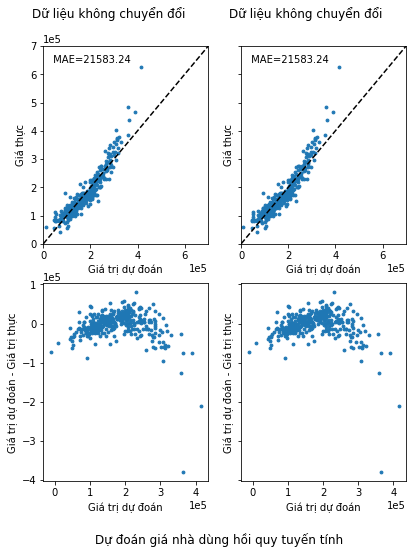

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import StandardScaler

f, (ax0, ax1)= plt.subplots(2,2, sharey="row", figsize=(6.5, 8))

regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred= regr.predict(X_test)

ax0[0].scatter(y_pred, y_test, s=8)
ax0[0].plot([0, 7e5], [0, 7e5], "--k")
ax0[0].set_ylabel("Giá thực")
ax0[0].set_xlabel("Giá trị dự đoán")
ax0[0].text(
    s="Dữ liệu không chuyển đổi",x=-5e4, y=8e5, fontsize=12, multialignment="center")
ax0[0].text(3e4, 64e4, r" MAE=%.2f"% (mean_absolute_error(y_test, y_pred)),)

ax0[0].set_xlim([0, 7e5])
ax0[0].set_ylim([0, 7e5])
ax0[0].ticklabel_format(axis="both", style="sci", scilimits=(0,0))
ax1[0].scatter(y_pred, (y_pred - y_test), s=8)
ax1[0].set_ylabel("Giá trị dự đoán - Giá trị thực")
ax1[0].set_xlabel("Giá trị dự đoán")
ax1[0].ticklabel_format(axis="both", style="sci", scilimits=(0,0))

regr_trans= TransformedTargetRegressor(
regressor= LinearRegression(),
transformer= StandardScaler(),
)

regr_trans.fit(X_train, y_train)
y_pred= regr_trans.predict(X_test)

ax0[1].scatter(y_pred, y_test, s=8)
ax0[1].plot([0, 7e5], [0, 7e5], "--k")
ax0[1].set_ylabel("Giá thực")
ax0[1].set_xlabel("Giá trị dự đoán")
ax0[1].text(
s="Dữ liệu không chuyển đổi",x=-5e4, y=8e5, fontsize=12, multialignment="center")
ax0[1].text(3e4, 64e4, r" MAE=%.2f"% (mean_absolute_error(y_test, y_pred)),)

ax0[1].set_xlim([0, 7e5])
ax0[1].set_ylim([0, 7e5])
ax0[1].ticklabel_format(axis="both", style="sci", scilimits=(0,0))
ax1[1].scatter(y_pred, (y_pred - y_test), s=8)
ax1[1].set_ylabel("Giá trị dự đoán - Giá trị thực")
ax1[1].set_xlabel("Giá trị dự đoán")
ax1[1].ticklabel_format(axis="both", style="sci", scilimits=(0,0))

f.suptitle("Dự đoán giá nhà dùng hồi quy tuyến tính", y=0.035)

plt.show()

Câu 7: Thực hiện tiền xử lý với code hình 4.29 trang 88 cho dữ liệu Customer từ file csv ở thực hành trước.


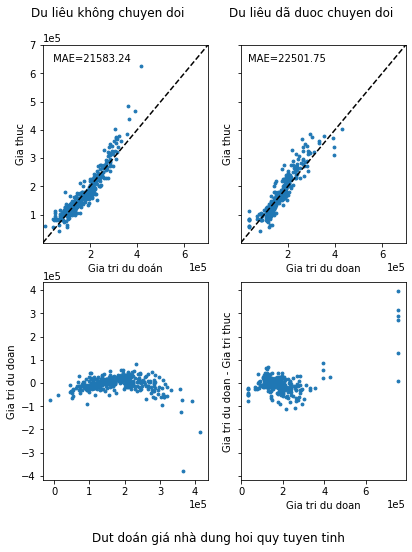

In [38]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error
from sklearn.compose import TransformedTargetRegressor
import pandas as pd


f, (ax0, ax1) = plt.subplots(2, 2, sharey="row", figsize=(6.5, 8))
df = pd.read_csv('Customers.csv')

regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

ax0[0].scatter (y_pred, y_test, s=8)
ax0[0].plot([10, 7e5], [0, 7e5], "--k")
ax0[0].set_ylabel("Gia thuc")
ax0[0].set_xlabel("Gia tri du doán")
ax0[0].text(
     s="Du liêu không chuyen doi" ,x=-5e4, y=8e5,fontsize=12,multialignment="center")
ax0[0].text(
     3e4, 64e4,r" MAE=%.2f"%(mean_absolute_error(y_test, y_pred)),)
ax0[0].set_xlim([10, 7e5])
ax0[0].set_ylim([10, 7e5])
ax0[0].ticklabel_format(axis="both",style="sci", scilimits= (0, 0))
ax1[0].scatter (y_pred, (y_pred - y_test), s=8)
ax1[0].set_ylabel("Gia tri du doan - Gia tri thuc")
ax1[0].set_ylabel("Gia tri du doan")
ax1[0].ticklabel_format(axis="both", style="sci", scilimits= (0, 0))

regr_trans  =TransformedTargetRegressor(
    regressor=LinearRegression(),
    transformer=QuantileTransformer(n_quantiles=900, output_distribution="uniform"),)
regr_trans.fit(X_train, y_train)
y_pred = regr_trans.predict(X_test)
ax0[1].scatter (y_pred, y_test, s=8)
ax0[1].plot([0, 7e5], [0, 7e5], "--k")
ax0[1].set_ylabel("Gia thuc")
ax0[1].set_xlabel("Gia tri du doan")
ax0[1].text(
     s="Du liêu dã duoc chuyen doi" ,x=-5e4, y=8e5, fontsize=12, multialignment="center",)

ax0[1].text(3e4, 64e4, r"MAE=%.2f" % ( mean_absolute_error(y_test, y_pred)),
           )          
ax0[1].set_xlim([10, 7e5])
ax0[1].set_ylim([10, 7e5])
ax0[1].ticklabel_format(axis="both", style="sci", scilimits=(0, 0) )
ax1[1].scatter (y_pred, (y_pred - y_test), s=8)
ax1[1].set_ylabel("Gia tri du doan - Gia tri thuc")
ax1[1].set_xlabel("Gia tri du doan")
ax1[1].ticklabel_format(axis="both", style="sci", scilimits= (0, 0))
f.suptitle( "Dut doán giá nhà dung hoi quy tuyen tinh", y=0.035)
plt.show()


Câu 8: Lựa chọn 1 trong các phương pháp tiền xử lý và thực hiện bài toán phân lớp (Các bạn chú ý: độ đo bài toán hồi quy có thể dùng MAE, RMSE; độ đo bài toán phân lớp là accuracy, f1-score,...) trên dữ liệu digit bao gồm 10 số như ở bài thực hành trước.


In [39]:
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
logistic_cl = linear_model.LogisticRegression()
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
X, y = load_digits(return_X_y=True)
print(X.shape)

(1797, 64)


In [40]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_validate
scanler = MinMaxScaler()
scoring = {'acc': 'accuracy',
          'prec_macro': 'precision_macro',
          'rec_micro': 'recall_macro', 'f1_scroe': 'f1_macro'}
scores = cross_validate(logistic_cl, X, y, scoring=scoring,
                       cv=2, return_train_score=True)
print('scanler')
scores

scanler


/home/toandokhanh/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/toandokhanh/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

{'fit_time': array([0.09380221, 0.05020881]),
 'score_time': array([0.00521088, 0.00321364]),
 'test_acc': array([0.89988877, 0.93095768]),
 'train_acc': array([1., 1.]),
 'test_prec_macro': array([0.91472259, 0.93419446]),
 'train_prec_macro': array([1., 1.]),
 'test_rec_micro': array([0.90007266, 0.93116137]),
 'train_rec_micro': array([1., 1.]),
 'test_f1_scroe': array([0.90269647, 0.9314643 ]),
 'train_f1_scroe': array([1., 1.])}